# **DTP 2 PLAYGROUND**

## MUST USING A100 HIGH RAM GPU for FINETUNING
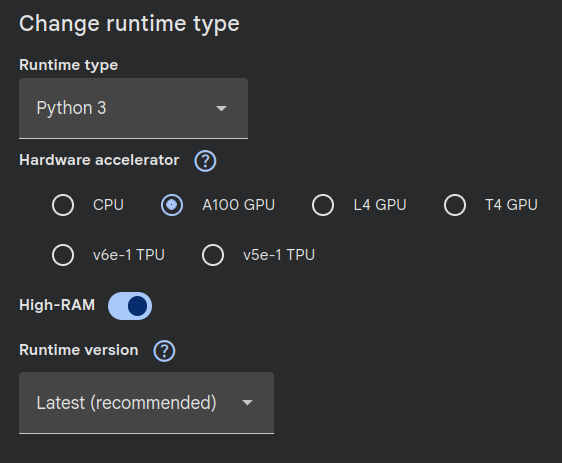

## **READ THIS for Fine Tuning steps installation**
1. **Open Colab Terminal**

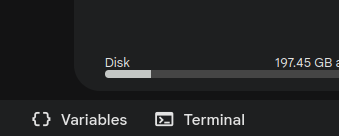

2.  **Clone Repo Fine Tuning**
```shell
git clone --branch wildan-branch https://github.com/DTP-Fine-Tuning/dtp-fine-tuning-research.git
```

3.  **Jump into Fine Tuning directory**
```shell
cd ~/dtp-fine-tuning-research
```

4. **Make executable for `scripts/` directory**
```shell
chmod +x scripts/*.sh
```

5. **Create .env file**
```shell
# install nano dulu
```shell
sudo apt-get install nano
```

```
cp .env.template .env
nano .env

# Harap isi dengan environment key masing-masing
```

6. **Install unsloth trl bitsandbytes**
```shell
pip install unsloth trl bitsandbytes
```

# -- USAGE EXAMPLES --
### Config Yaml Files:
pastikan membuat file baru dari `configs/test/sft_multi-turn_unsloth_guide.yaml` terus apabila melakukan training untuk run confignya tambahkan run keberapa ex: run-2
```yaml
  run_name: "SFT-Bakti-8B-Base-MultiTurn-Chatbot-run-2"
```

### Training Multi Turn
untuk melakukan fine tuning tanpa disconnect teman-teman bisa melakukan finetuning dengan command berikut pada terminal
```shell
yes | nohup bash ./scripts/run_training_unsloth.sh -s src/training/train_unsloth_multi-turn.py -c configs/test/arahin_sesuai_config_yaml_teman2.yaml --skip-checks > training_log.txt 2>&1 &
```

untuk melihat proses training log melalui command berikut
```shell
tail -f training_log.txt
```

### Fine tuning metrics understanding
pastikan teman-teman membaca dokumentasi understanding loss_curve pada `docs/loss_curve_guide.md` untuk memahami metrik yang dihasilkan ketika fine tuning

### cara kill proses training
jalankan kode ini di terminal
```shell
ps -ef | grep "train_unsloth_multi-turn.py"
```

pilih pid yang ada di folder skrip train
```shell
#contoh
kill -9 12733 12725
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from google.colab import files

files.download("/content/dtp-fine-tuning-research/SFT-KomdigiUB-8B-Base-MultiTurn-4096-0_05-checkpoint-600.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Trik Audio "Anti-Sleep" Ringan
import time
from IPython.display import Audio, display
import numpy as np

def audio_keep_alive():
    # Membuat audio "silent" (hening) durasi 1 detik
    # Ini cukup untuk menipu browser agar mengira ada media yang sedang diputar
    sr = 22050 # Sample rate
    t = 0.1    # Durasi pendek saja
    x = np.zeros(int(t * sr)) # Suara hening (nol)

    # Menampilkan kontrol audio & memutarnya secara otomatis (autoplay)
    display(Audio(x, rate=sr, autoplay=True))
    print("Keep-alive audio ping sent...")

# Jalankan loop ini
while True:
    audio_keep_alive()
    time.sleep(600) # Ulangi setiap 10 menit (600 detik)

/usr/local/lib/python3.12/dist-packages/IPython/lib/display.py:174: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
/usr/local/lib/python3.12/dist-packages/IPython/lib/display.py:175: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


Keep-alive audio ping sent...


Keep-alive audio ping sent...


Keep-alive audio ping sent...


In [ ]:
!zip -r /content/SFT-Thinking-KomdigiUB-8B-Base-MultiTurn-Chatbot-checkpoint-300.zip /content/dtp-fine-tuning-research/SFT-KomdigiUB-8B-Base-MultiTurn-Chatbot-checkpoint-300

	zip warning: name not matched: /content/dtp-fine-tuning-research/SFT-KomdigiUB-8B-Base-MultiTurn-Chatbot-checkpoint-300

zip error: Nothing to do! (try: zip -r /content/SFT-Thinking-KomdigiUB-8B-Base-MultiTurn-Chatbot-checkpoint-300.zip . -i /content/dtp-fine-tuning-research/SFT-KomdigiUB-8B-Base-MultiTurn-Chatbot-checkpoint-300)


# MERGE & UPLOAD MODEL

In [ ]:
import torch
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer
from huggingface_hub import login

In [ ]:

# Load LoRA model & merge ke model utama
model = AutoPeftModelForCausalLM.from_pretrained(
    "wildanaziz/chatbot_multiturn_diploy_adapter",
    torch_dtype=torch.bfloat16,
    device_map="auto"
)
merged_model = model.merge_and_unload()

# Load tokenizer
BASE_MODEL = "aitfindonesia/KominfoUB-8B-Base"
tokenizer = AutoTokenizer.from_pretrained(
    BASE_MODEL,
    trust_remote_code=True)

SAVE_DIR = "/content/merge_model"
merged_model.save_pretrained(SAVE_DIR)
tokenizer.save_pretrained(SAVE_DIR)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/175M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

chat_template.jinja:   0%|          | 0.00/327 [00:00<?, ?B/s]

('/content/merge_model/tokenizer_config.json',
 '/content/merge_model/special_tokens_map.json',
 '/content/merge_model/chat_template.jinja',
 '/content/merge_model/additional_chat_templates/chat_template.jinja',
 '/content/merge_model/vocab.json',
 '/content/merge_model/merges.txt',
 '/content/merge_model/added_tokens.json',
 '/content/merge_model/tokenizer.json')

In [ ]:
REPO_ID = "aitfindonesia/KomdigiUB-8B-Instruct-DTP"

In [ ]:
from huggingface_hub import HfApi

In [ ]:
api = HfApi()

try:
    print(f"Mencoba membuat repositori: {REPO_ID}")
    api.create_repo(repo_id=REPO_ID, repo_type="model", exist_ok=True)
    print("Repositori berhasil dibuat atau sudah ada.")
except Exception as e:
    print(f"Gagal membuat repositori. Pastikan token Anda memiliki izin yang benar: {e}")

try:
    print(f"\nMulai mengunggah folder: {SAVE_DIR} ke {REPO_ID}")
    api.upload_folder(
        folder_path=SAVE_DIR,
        repo_id=REPO_ID,
        # commit_message="Initial model upload"
    )
    print(f"\nModel berhasil diupload ke https://huggingface.co/{REPO_ID}")
except Exception as e:
    print(f"Gagal mengunggah folder: {e}")

Mencoba membuat repositori: aitfindonesia/KomdigiUB-8B-Instruct-DTP
Repositori berhasil dibuat atau sudah ada.

Mulai mengunggah folder: /content/merge_model ke aitfindonesia/KomdigiUB-8B-Instruct-DTP


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...0001-of-00004.safetensors:   1%|1         | 50.3MB / 4.90GB            

  ...0004-of-00004.safetensors:   2%|2         | 33.5MB / 1.58GB            

  ...0003-of-00004.safetensors:   1%|          | 41.8MB / 4.98GB            

  ...0002-of-00004.safetensors:   1%|          | 41.9MB / 4.92GB            

  ...erge_model/tokenizer.json: 100%|##########| 11.4MB / 11.4MB            


Model berhasil diupload ke https://huggingface.co/aitfindonesia/KomdigiUB-8B-Instruct-DTP


# EVAL with LM-EVAL

In [ ]:
pip install lm-eval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 9.7 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=9607acb020b1d117175bd5f1259148754cf3eed6fb20428408559efb14fe0528
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
  Created wheel for sqlitedict: filename=sqlitedict-2.1

In [ ]:
!lm_eval --model hf \
    --model_args pretrained=dtp-fine-tuning/chatbot_diploy_multiturn \
    --tasks hellaswag,arc_challenge \
    --device cuda:0 \
    --batch_size 8

2025-12-12 17:54:41.605191: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 17:54:41.622486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765562081.643664    6512 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765562081.650131    6512 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765562081.666509    6512 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
!lm_eval --model hf \
    --model_args pretrained=Qwen/Qwen3-8B \
    --tasks hellaswag,arc_challenge \
    --device cuda:0 \
    --batch_size 8

2025-12-12 18:05:34.883097: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 18:05:34.900748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765562734.922451    9328 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765562734.929063    9328 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765562734.945741    9328 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

#FIX

In [ ]:
pip install lm-eval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 9.8 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=1fd4644025010716de0d783e8dfdffd832950a3d3f5154377b61e16d9420ed88
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
  Created wheel for sqlitedict: filename=sqlitedict-2.

In [ ]:
pip install lm-eval[api]

In [ ]:
!lm_eval --model hf \
    --model_args pretrained=Qwen/Qwen3-8B \
    --tasks xcopa_id, ifeval \
    --device cuda:0 \
    --batch_size 8

usage: lm_eval [-h] [--model MODEL] [--tasks task1,task2]
               [--model_args MODEL_ARGS] [--num_fewshot N]
               [--batch_size auto|auto:N|N] [--max_batch_size N]
               [--device DEVICE] [--output_path DIR|DIR/file.json]
               [--limit N|0<N<1] [--samples /path/to/json] [--use_cache DIR]
               [--cache_requests {true,refresh,delete}] [--check_integrity]
               [--write_out] [--log_samples]
               [--system_instruction SYSTEM_INSTRUCTION]
               [--apply_chat_template [APPLY_CHAT_TEMPLATE]]
               [--fewshot_as_multiturn] [--show_config] [--include_path DIR]
               [--gen_kwargs GEN_KWARGS]
               [--verbosity CRITICAL|ERROR|WARNING|INFO|DEBUG]
               [--wandb_args WANDB_ARGS]
               [--wandb_config_args WANDB_CONFIG_ARGS]
               [--hf_hub_log_args HF_HUB_LOG_ARGS] [--predict_only]
               [--seed SEED] [--trust_remote_code] [--confirm_run_unsafe_code]
           

In [ ]:
!lm_eval --model hf \
    --model_args pretrained=dtp-fine-tuning/chatbot_diploy_multiturn \
    --tasks xcopa_id, ifeval \
    --device cuda:0 \
    --batch_size 8

2025-12-13 04:48:55.695269: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-13 04:48:55.713098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765601335.735163   17911 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765601335.741770   17911 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765601335.758731   17911 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
!lm_eval --model hf \
    --model_args pretrained=dtp-fine-tuning/Agq_Question_Diploy \
    --tasks truthfulqa_mc2,xcopa_id \
    --device cuda:0 \
    --batch_size 8

2025-12-13 04:12:11.044025: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-13 04:12:11.061717: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765599131.083974    8101 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765599131.090526    8101 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765599131.107450    8101 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
!lm_eval --model hf \
    --model_args pretrained=Qwen/Qwen3-8B \
    --tasks truthfulqa_mc2,xcopa_id \
    --device cuda:0 \
    --batch_size 8

2025-12-13 04:16:13.355288: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-13 04:16:13.374514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765599373.396847    9290 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765599373.403503    9290 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765599373.421236    9290 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 